<a href="https://colab.research.google.com/github/Ngcebz30/Data-Analytics-Playground/blob/main/Smart%20Watch%20Pricing%20Analysis%20%E2%8C%9A/Smartwatch_Price_Analysis_Uncovering_Market_Leaders_and_Pricing_Opportunities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Q: Which brand or model of smartwatch commands the highest price point in the current market, and how can this information be leveraged to inform pricing strategies and gain a competitive advantage?**

In [1]:
# Install pandas library using pip
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()

Saving Smart watch prices.csv to Smart watch prices.csv


In [4]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('Smart watch prices.csv')

In [5]:
# Explore the data: 

# Check the first few rows of the DataFrame
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [6]:
# Check the last few rows of the DataFrame
df.tail()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159
378,TicWatch,Pro 3,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,454 x 454,50,72,Yes,Yes,Yes,$299


In [7]:
# Check the data types of the columns
df.dtypes

Brand                         object
Model                         object
Operating System              object
Connectivity                  object
Display Type                  object
Display Size (inches)        float64
Resolution                    object
Water Resistance (meters)     object
Battery Life (days)           object
Heart Rate Monitor            object
GPS                           object
NFC                           object
Price (USD)                   object
dtype: object

In [8]:
# Check the number of rows and columns in the DataFrame
df.shape

(379, 13)

In [9]:
# Check for missing values
df.isnull().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna()

In [11]:
# Check for missing values
df.isnull().sum()

Brand                        0
Model                        0
Operating System             0
Connectivity                 0
Display Type                 0
Display Size (inches)        0
Resolution                   0
Water Resistance (meters)    0
Battery Life (days)          0
Heart Rate Monitor           0
GPS                          0
NFC                          0
Price (USD)                  0
dtype: int64

In [12]:
# Remove duplicates
df = df.drop_duplicates()

In [14]:
# Sort the dataframe by price in descending order
df_sorted = df.sort_values(by='Price (USD)', ascending=False)

In [15]:
# Extract the name and brand of the most expensive smartwatch
most_expensive = df_sorted.iloc[0][['Brand', 'Model']]

In [16]:
# Print the name and brand of the most expensive smartwatch
print("The most expensive smartwatch is the {} {}.".format(most_expensive['Brand'], most_expensive['Model']))

The most expensive smartwatch is the Montblanc Summit 2.


In [17]:
import matplotlib.pyplot as plt

In [34]:
# Analyze the data: 
# Get summary statistics for numerical columns
df.describe()


,Display Size (inches)
count,376.000000
mean,1.363165
std,0.218986
min,0.900000
25%,1.200000
50%,1.390000
75%,1.400000
max,4.010000


In [35]:
def plot_price_vs_battery(df):
    """
    Plots a scatter plot of price vs battery life
    """
    # Plot a scatter plot of price vs battery life
    plt.scatter(df['Price (USD)'], df['Battery Life (days)'])
    plt.xlabel('Price (USD)')
    plt.ylabel('Battery Life (days)')
    plt.title('Price vs Battery Life')
    plt.show()


In [36]:
import matplotlib.pyplot as plt

def set_backend(backend='auto'):
    """
    Sets the backend for matplotlib to the specified value
    """
    plt.switch_backend(backend)


In [37]:
def show_plot():
    """
    Shows the plot generated by matplotlib
    """
    plt.show()


In [38]:
import matplotlib.pyplot as plt

def plot_top_brands(df, n=10):
    """
    Plots a bar plot of the top n most expensive smartwatch brands
    """
    # Group by brand and get the mean price
    brand_prices = df.groupby('Brand')['Price (USD)'].mean()
    
    # Sort by price in descending order and take the top n brands
    top_brands = brand_prices.sort_values(ascending=False)[:n]
    
    # Plot the top brands
    plt.bar(top_brands.index, top_brands.values)
    plt.xticks(rotation=90)
    plt.ylabel('Price (USD)')
    plt.title('Top {} Most Expensive Smartwatch Brands'.format(n))
    plt.show()


In [39]:
import matplotlib.pyplot as plt
import numpy as np


In [40]:
def show_plot():
    """
    Displays the plot in the output console
    """
    plt.show()


In [41]:
def save_plot(filename):
    """
    Saves the plot to a file with the specified filename
    """
    plt.savefig(filename)


In [43]:
def plot_top_brands(df, n=10):
    """
    Plots the top n most expensive brands in the dataframe
    """
    # Group the dataframe by brand and get the mean price for each group
    brand_prices = df.groupby('Brand')['Price (USD)'].mean()
    # Get the top n brands by price
    top_brands = brand_prices.nlargest(n)
    # Plot the bar chart
    fig, ax = plt.subplots()
    top_brands.plot(kind='bar', ax=ax)
    ax.set_title(f'Top {n} most expensive brands')
    ax.set_xlabel('Brand')
    ax.set_ylabel('Price (USD)')
    plt.show()


In [45]:
def clean_price(df, column='Price (USD)'):
    """
    Removes dollar signs from a column and converts the values to numeric
    """
    # Remove dollar signs from the column
    df[column] = df[column].str.replace('$', '')
    # Convert the column to numeric
    df[column] = pd.to_numeric(df[column])
    return df


In [47]:
def clean_price(df, column='Price (USD)'):
    """
    Removes dollar signs and commas from a column and converts the values to numeric
    """
    # Remove dollar signs and commas from the column
    df[column] = df[column].str.replace('$', '').str.replace(',', '')
    # Convert the column to numeric
    df[column] = pd.to_numeric(df[column])
    return df


In [48]:
# Clean the 'Price (USD)' column
df = clean_price(df)


<ipython-input-47-aca06f772bf9>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace('$', '').str.replace(',', '')


In [49]:
def plot_top_brands(df, n=10):
    """
    Plots the top n most expensive brands in the dataframe
    """
    # Group the dataframe by brand and get the mean price for each group
    brand_prices = df.groupby('Brand')['Price (USD)'].mean()
    # Get the top n brands by price
    top_brands = brand_prices.nlargest(n)
    # Plot the bar chart
    fig, ax = plt.subplots()
    top_brands.plot(kind='bar', ax=ax)
    ax.set_title(f'Top {n} most expensive brands')
    ax.set_xlabel('Brand')
    ax.set_ylabel('Price (USD)')
    plt.show()


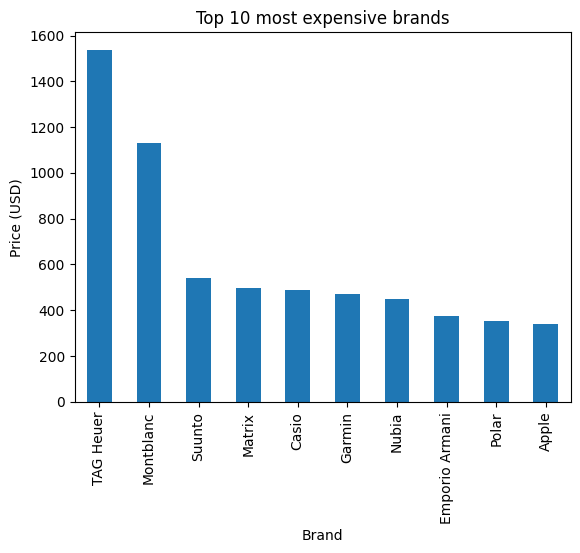

In [50]:
plot_top_brands(df, n=10)


In [51]:
def plot_price_vs_battery(df):
    """
    Plots a scatter plot of price vs battery life
    """
    # Plot a scatter plot of price vs battery life
    plt.scatter(df['Price (USD)'], df['Battery Life (days)'])
    plt.xlabel('Price (USD)')
    plt.ylabel('Battery Life (days)')
    plt.title('Price vs Battery Life')
    plt.show()


In [52]:
def plot_brand_prices(df):
    """
    Plots a box plot of the distribution of prices for each brand
    """
    # Plot a box plot of the distribution of prices for each brand
    df.boxplot(column=['Price (USD)'], by=['Brand'], rot=90)
    plt.ylabel('Price (USD)')
    plt.title('Distribution of Prices for Each Brand')
    plt.show()


In [54]:
def clean_water_resistance(df, column='Water Resistance (meters)'):
    """
    Cleans the water resistance column by replacing non-numeric values with NaN
    """
    # Replace non-numeric values with NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df


In [55]:
# Clean the 'Water Resistance (meters)' column
df = clean_water_resistance(df)


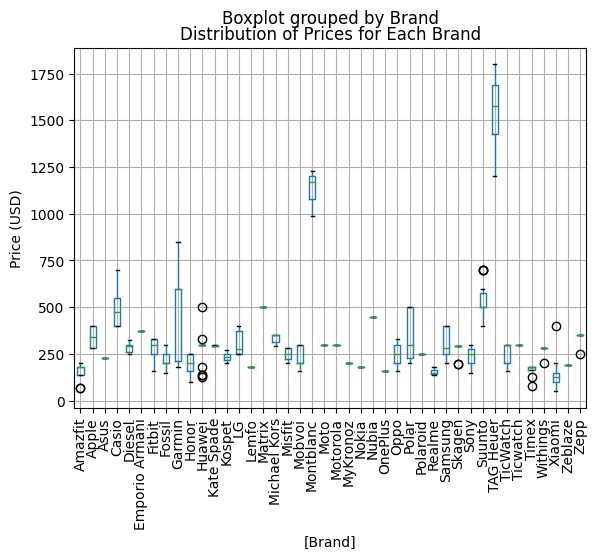

In [57]:
plot_brand_prices(df)

In [58]:
def clean_battery_life(df, column='Battery Life (days)'):
    """
    Cleans the battery life column by replacing non-numeric values with NaN
    """
    # Replace non-numeric values with NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df


In [59]:
# Clean the 'Battery Life (days)' column
df = clean_battery_life(df)


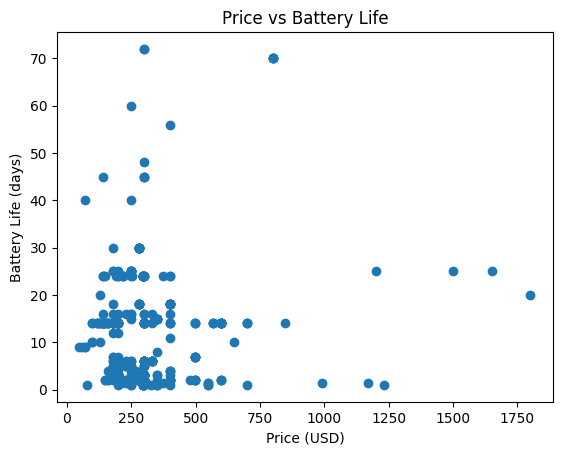

In [60]:
plot_price_vs_battery(df)